

# Project: The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will focus on the dataset of The Movie Database(TMDb). The data set has information about Revenue, rating, vote, budget and genres etc. from 10.000 movies. First of all, we assess and clean the data set, and drop some columns which are less important for our Research questions. At first time, we import all important packages which are more useful for our project.
After that we make the data wrangling, cleaning, Explotary data analysis with visualization to find answers for our Research questions.

>Our Research questions are below:

> 1. Which genres are most popular from year to year?

> 2. What kinds of properties are associated with movies that have high revenues?

> 3. Are there relationship between higher vote and budget?



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:

df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# After info function, we can see that which columns have missing data, data types, and number of samples and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning (Replace this with more specific notes!)
> In this section, we find duplicates and missing values which can be NaN values to clarify our data set to analyze.

In [6]:
#we use the drop function with inplace to save changes,
# this function also help us to drop less important and missing columns from our dataset
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime','production_companies','release_date','director', 'cast'], axis=1, inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


In [8]:
# In this part, we see that we have 1 duplicate value.
sum(df.duplicated())

1

In [9]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10853    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [10]:
# with loc function, we can find the exact duplicates values.
df.loc[df.duplicated(keep= False), :]

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,30000000,967000,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,30000000,967000,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [11]:
# using this functin, we can remove the duplicates values and save changes wiht inplace
df.drop_duplicates(inplace=True)

In [12]:
#after we check 
sum(df.duplicated())

0

In [13]:
# After all we need to find NaN values, Before we see that we have some missing values in genre columns. 
df.isnull()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Below it is showed that we have 23 Nan values in column genres
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [15]:
# we use the dropna function to remove this NaN values from our dataset
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
id                10842 non-null int64
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
genres            10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1016.4+ KB


In [18]:
df.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
df.shape

(10842, 11)

In [20]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


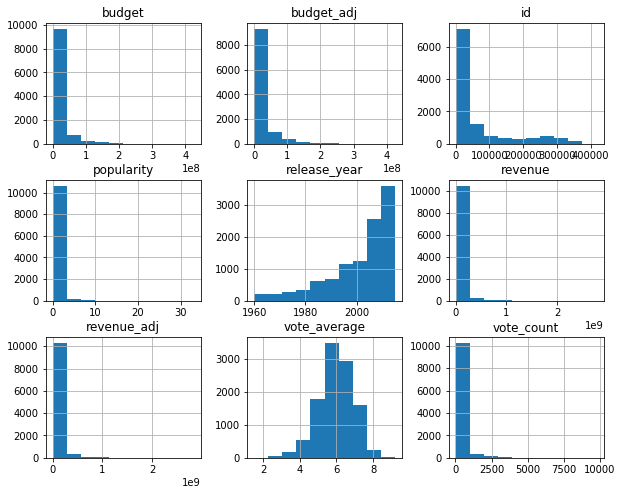

In [21]:

df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

>  After data Wrangling we can make data exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we give brief information in the Introduction section.

### Research Question 1: Which genres are most popular from year to year?

First of all, we have | mark, we need to drop this mark, for this reason we use the function which can see below.

In [22]:
split_columns = ['genres']

In [23]:
for c in split_columns:
    df[c] = df[c].apply(lambda x: x.split("|")[0])

In [24]:
df.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


In [25]:
df.genres.value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

In [26]:
# we use groupby function to show the mean of popularity
df.groupby('genres').popularity.mean()

genres
Action             0.836394
Adventure          1.217868
Animation          0.810370
Comedy             0.537133
Crime              0.694063
Documentary        0.177023
Drama              0.552446
Family             0.730987
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468611
Music              0.447730
Mystery            0.596896
Romance            0.704157
Science Fiction    1.073096
TV Movie           0.246190
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64

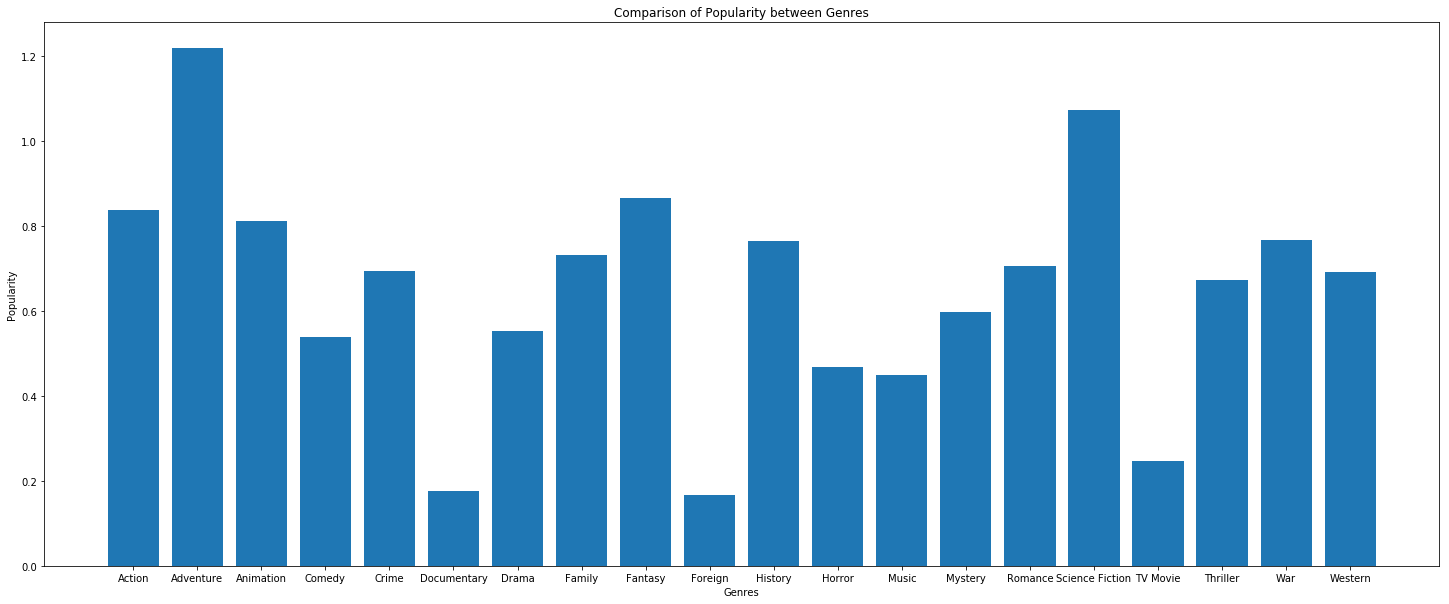

In [29]:

df_1=df.groupby('genres').popularity.mean()
plt.subplots(figsize=(25, 10))
plt.bar(df_1.index, df_1)
plt.title('Comparison of Popularity between Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity');

We create the bar chart to show which genre has higer popularity,
Bar chart gives us information that Adventure and Science fiction movies have higer popularity than ohters.

In [30]:
df.release_year.value_counts()

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [31]:
# but first bar chart dont give the answer for our Research question
# For this reason, we create new table with using pivot_table function
movie_year= df.pivot_table(index="release_year", columns='genres', values= 'popularity')
movie_year.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.304992,NaN,0.392067,0.269428,NaN,0.687575,NaN,NaN,NaN,NaN,0.254964,NaN,NaN,NaN,NaN,NaN,0.456165,NaN,NaN
1961,0.540904,1.394596,NaN,0.431700,NaN,NaN,0.361247,NaN,0.154073,NaN,NaN,0.254578,0.900245,NaN,0.027527,0.083697,NaN,NaN,NaN,0.210021
1962,0.299207,1.283631,NaN,0.181376,0.472816,NaN,0.341549,NaN,0.235542,NaN,NaN,0.165468,NaN,0.630948,NaN,NaN,NaN,0.153654,NaN,0.516593
1963,1.008599,0.362011,2.180410,0.504427,NaN,NaN,0.321260,NaN,NaN,NaN,NaN,0.411516,NaN,0.336792,0.144419,NaN,NaN,NaN,NaN,NaN
1964,0.254216,0.736431,0.445746,0.476446,0.251529,NaN,0.490648,NaN,0.057243,NaN,NaN,0.206916,0.068176,NaN,NaN,NaN,NaN,0.218741,NaN,0.127679


In [32]:
# after that we see that we have a lot of Nan values
movie_year.isnull().sum()

genres
Action              0
Adventure           0
Animation          10
Comedy              0
Crime               6
Documentary        15
Drama               0
Family             21
Fantasy             9
Foreign            49
History            34
Horror              0
Music              21
Mystery            13
Romance            15
Science Fiction     9
TV Movie           27
Thriller            6
War                28
Western            28
dtype: int64

In [33]:
movie_year.mean()

genres
Action             0.652025
Adventure          1.079606
Animation          0.781733
Comedy             0.474275
Crime              0.618179
Documentary        0.188257
Drama              0.520632
Family             0.764944
Fantasy            0.719685
Foreign            0.179112
History            0.627121
Horror             0.448235
Music              0.500489
Mystery            0.500139
Romance            0.733181
Science Fiction    0.825360
TV Movie           0.251861
Thriller           0.565257
War                0.593057
Western            0.626480
dtype: float64

In [34]:
# we replace NaN values with mean of each column wiht using fillna function
mean=movie_year.mean()
movie_year.fillna(mean, inplace=True)

In [35]:
movie_year.head()


genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.304992,0.781733,0.392067,0.269428,0.188257,0.687575,0.764944,0.719685,0.179112,0.627121,0.254964,0.500489,0.500139,0.733181,0.825360,0.251861,0.456165,0.593057,0.626480
1961,0.540904,1.394596,0.781733,0.431700,0.618179,0.188257,0.361247,0.764944,0.154073,0.179112,0.627121,0.254578,0.900245,0.500139,0.027527,0.083697,0.251861,0.565257,0.593057,0.210021
1962,0.299207,1.283631,0.781733,0.181376,0.472816,0.188257,0.341549,0.764944,0.235542,0.179112,0.627121,0.165468,0.500489,0.630948,0.733181,0.825360,0.251861,0.153654,0.593057,0.516593
1963,1.008599,0.362011,2.180410,0.504427,0.618179,0.188257,0.321260,0.764944,0.719685,0.179112,0.627121,0.411516,0.500489,0.336792,0.144419,0.825360,0.251861,0.565257,0.593057,0.626480
1964,0.254216,0.736431,0.445746,0.476446,0.251529,0.188257,0.490648,0.764944,0.057243,0.179112,0.627121,0.206916,0.068176,0.500139,0.733181,0.825360,0.251861,0.218741,0.593057,0.127679


In [36]:
# we select the data set from 2005
pivoted=movie_year[movie_year.index > 2005]
pivoted.head()



genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
2006,0.511397,1.125968,0.828181,0.560309,0.678514,0.171192,0.526403,0.525388,1.189740,0.179112,0.654178,0.426211,1.340167,0.545165,0.743107,0.686627,0.241585,1.185782,0.770332,0.463068
2007,0.665643,1.102047,0.682296,0.469510,0.663260,0.220588,0.493298,0.953053,0.859032,0.179112,0.578112,0.587472,0.210417,0.230685,0.224312,0.927528,0.225199,0.858667,0.593057,1.150389
2008,0.734961,1.085703,0.921398,0.504318,0.419935,0.151561,0.538931,0.705724,0.914167,0.136851,0.357121,0.345459,0.559958,0.968992,0.463269,0.948857,0.334713,0.579428,0.939099,0.626480
2009,0.741412,1.055064,0.806035,0.521033,0.439934,0.207051,0.529003,0.609218,1.126980,0.113480,1.138277,0.427969,0.266394,0.342485,1.267520,0.819890,0.399504,0.748120,0.302821,0.626480
2010,1.025166,1.600994,0.595166,0.547223,0.543418,0.228012,0.576851,1.126484,0.974175,0.229124,0.224171,0.429749,0.116925,0.362476,0.595049,0.478174,0.366759,0.626624,0.632087,0.626480


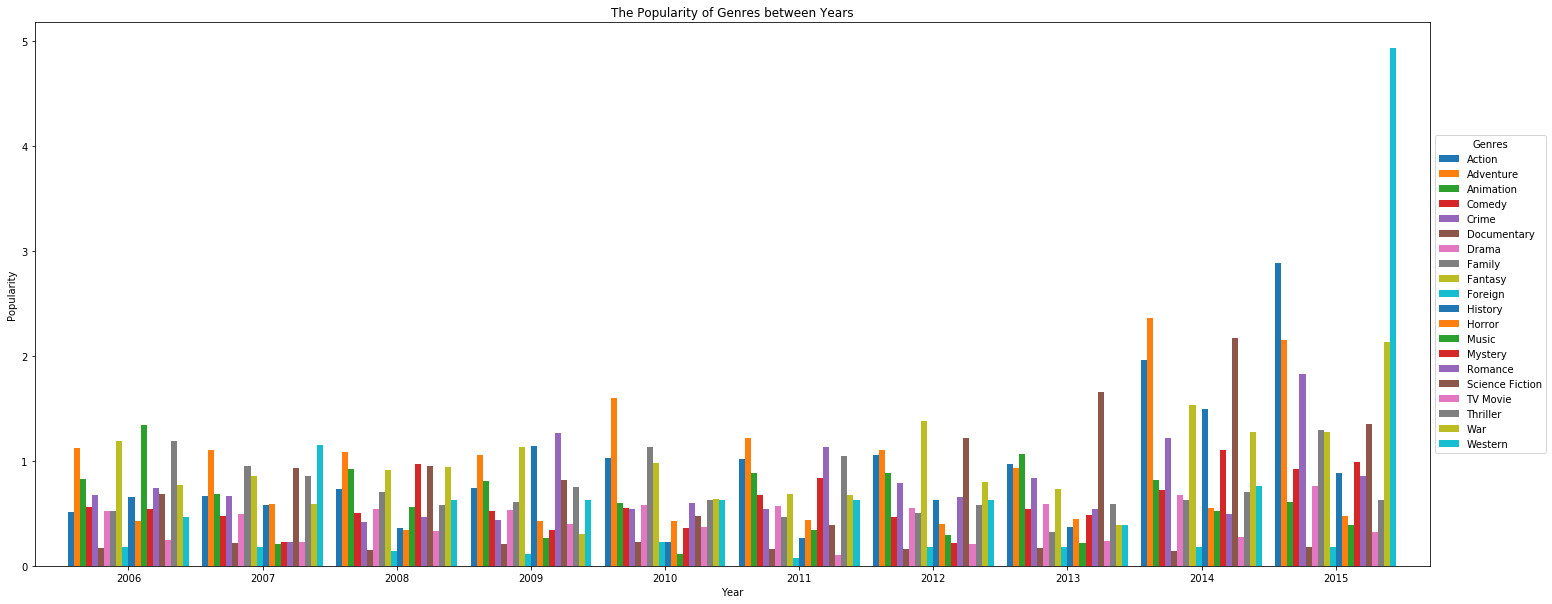

In [47]:

pivoted.plot.bar(width=0.9, figsize=(25,10), rot=0)
plt.title('The Popularity of Genres between Years')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),
           title='Genres');


We created the second bar chart and we can see that western and action movies increase year by year.

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [39]:
#at First, we see the mean of revenue for each genre
df.groupby('genres').revenue.mean()

genres
Action             6.075854e+07
Adventure          1.247560e+08
Animation          7.145670e+07
Comedy             2.930248e+07
Crime              3.343632e+07
Documentary        1.972712e+06
Drama              2.514403e+07
Family             6.148926e+07
Fantasy            6.729393e+07
Foreign            0.000000e+00
History            4.436062e+07
Horror             1.686626e+07
Music              2.304616e+07
Mystery            2.415905e+07
Romance            3.788650e+07
Science Fiction    7.965608e+07
TV Movie           5.384615e+05
Thriller           2.648324e+07
War                4.590766e+07
Western            3.109095e+07
Name: revenue, dtype: float64

In [40]:
df.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


In [41]:
# For finding answer for second Research queston , we need to find correlation between 
df.corr()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.013371,-0.140752,-0.098793,-0.034908,-0.060599,0.511300,-0.188485,-0.138126
popularity,-0.013371,1.000000,0.545271,0.663268,0.800786,0.210432,0.090200,0.513311,0.608964
budget,-0.140752,0.545271,1.000000,0.734851,0.632601,0.081729,0.116312,0.968949,0.622406
revenue,-0.098793,0.663268,0.734851,1.000000,0.791122,0.173254,0.057324,0.706360,0.919088
vote_count,-0.034908,0.800786,0.632601,0.791122,1.000000,0.254698,0.108275,0.586923,0.707865
vote_average,-0.060599,0.210432,0.081729,0.173254,0.254698,1.000000,-0.119851,0.093811,0.193836
release_year,0.511300,0.090200,0.116312,0.057324,0.108275,-0.119851,1.000000,0.017076,-0.066118
budget_adj,-0.188485,0.513311,0.968949,0.706360,0.586923,0.093811,0.017076,1.000000,0.646507
revenue_adj,-0.138126,0.608964,0.622406,0.919088,0.707865,0.193836,-0.066118,0.646507,1.000000


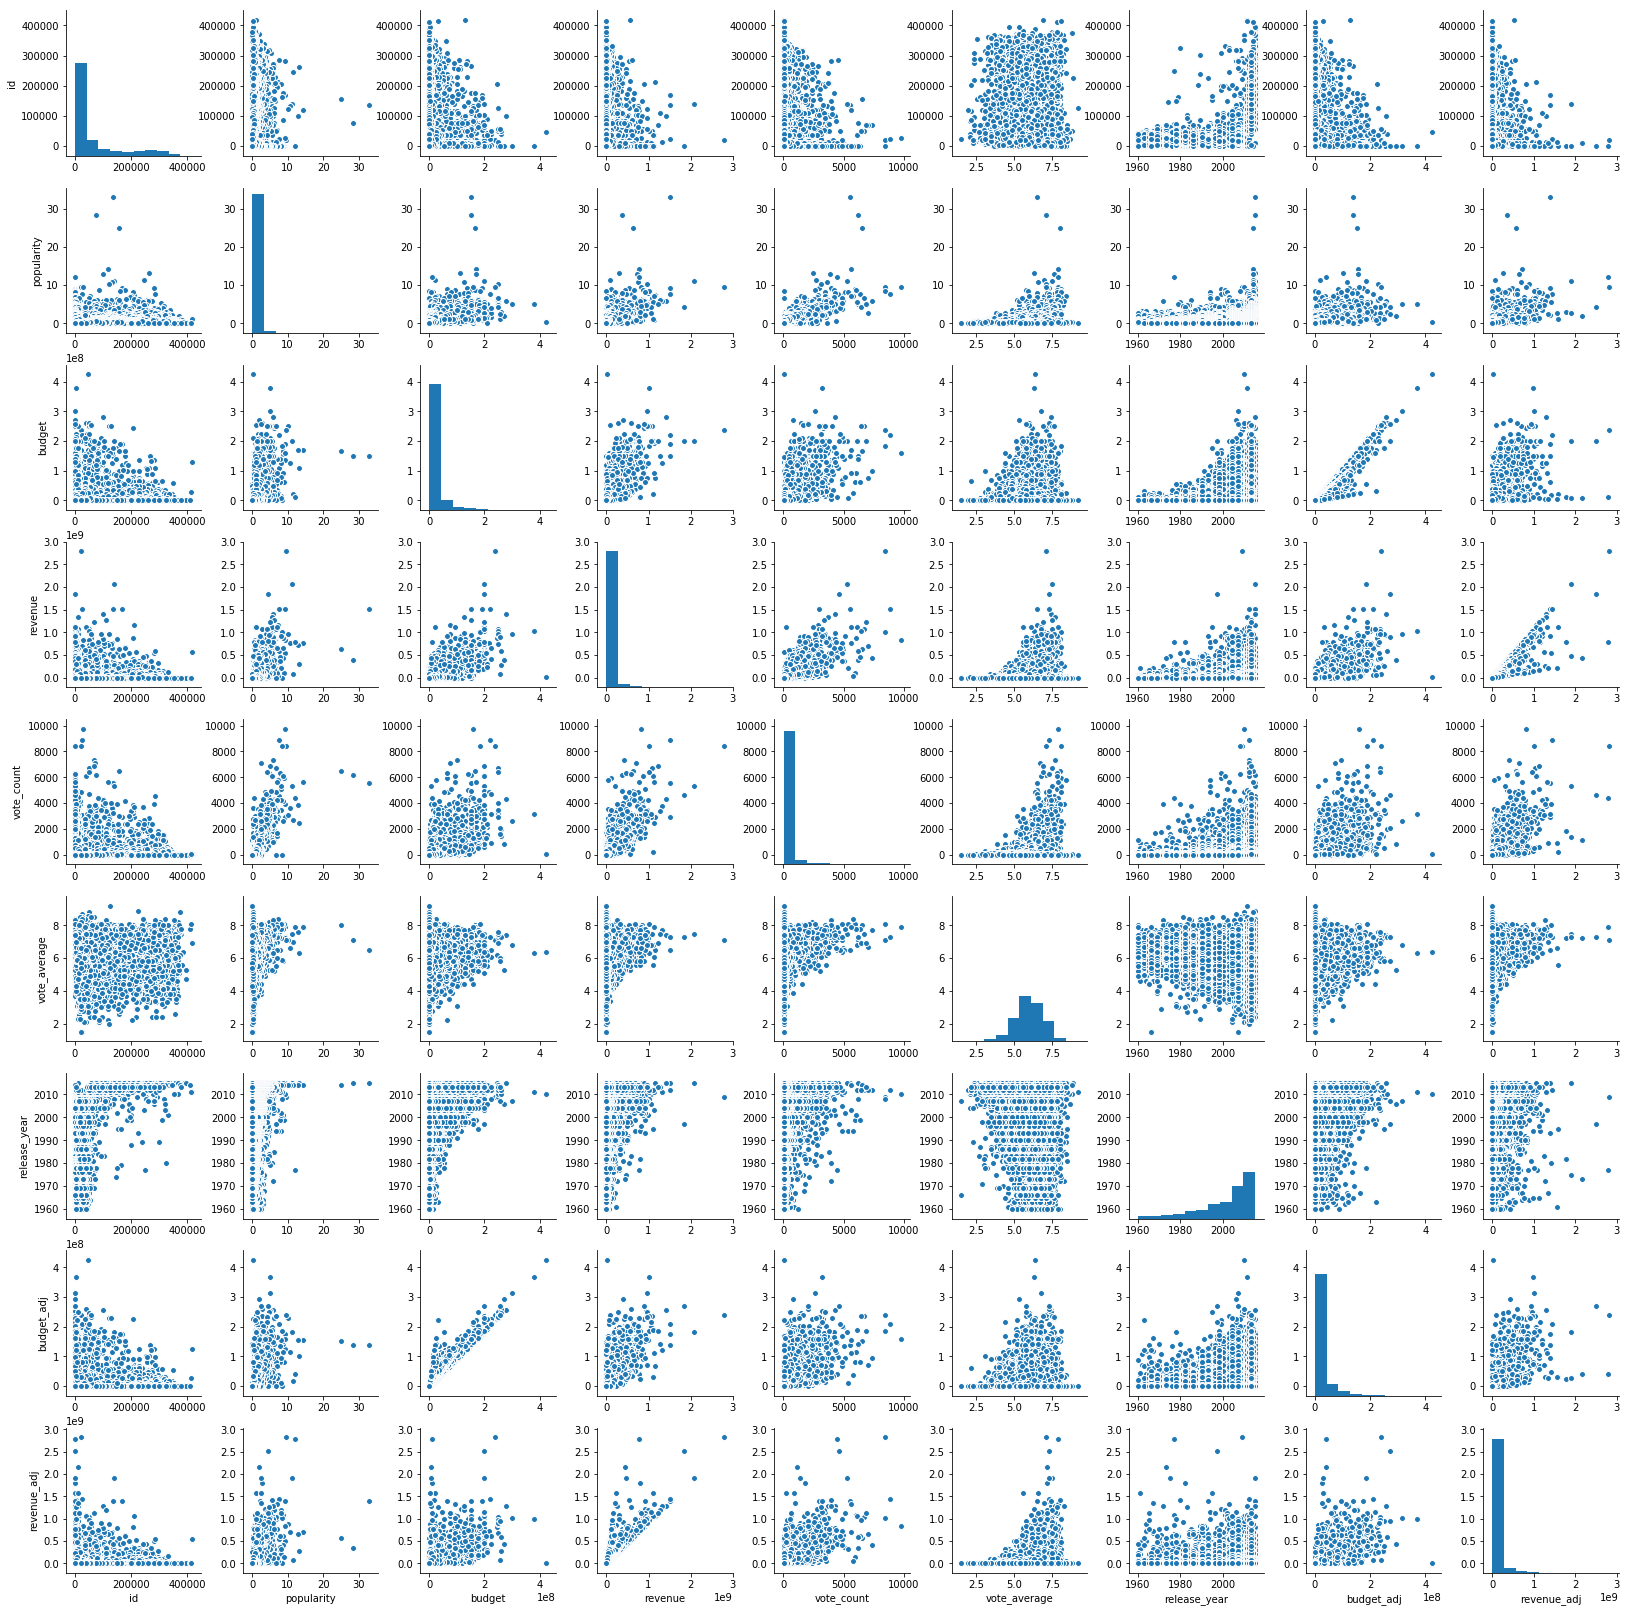

In [42]:
sns.pairplot(df)

Text(0.5,1,'Correlation between values')

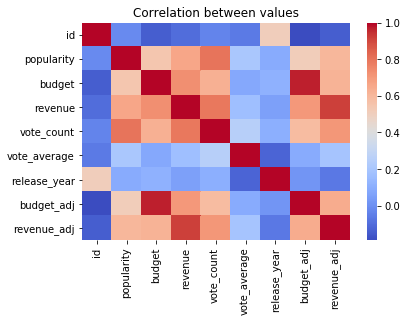

In [44]:

sns.heatmap(df.corr(), cmap= 'coolwarm')
plt.title('Correlation between values')

After all we use heatmap to show correlation.
We see that there are positive correlation between revenue and budget, and between revenue and vote count.

### Research question 3: Are there  relationship between higher vote and budget?
>at Below we try to find the answer and make hypothesis testing
>In Order to conduct A/B testing , there are 2 assumptons to be ensured: 
1. THE ASSUMPTION OF NORMALITY ----> WHETHER BOTH GROUPS HAVE NORMAL DISTRIBUTION (SHAPIRO WILKS TEST)
2. THE ASSUMPTION OF HOMOGENEITY OF VARIANCE --->  LEVENE TEST

##### We can see that there is no big differences between two groups which are more and less than 6.5 vote average
##### For this reason we use A/B testing

In [41]:
df.loc[df["vote_average"] >= 6.5, "budget"].mean()

16218338.675203726

In [43]:
df.loc[df["vote_average"] <= 6.5, "budget"].mean()

14212622.13951418

#### HYPOTHESES
###### H0 : THERE IS NO STATISTICALLY SIGNIFICANT DIFFERENCE BETWEEN THE MEANS OF TWO GROUPS
###### H1 : THERE IS STATISTICALLY SIGNIFICANT DIFFERENCE BETWEEN THE MEANS OF TWO GROUPS

In [44]:
# first of all, we need to import the package which can help us to make statistical calculation
from scipy.stats import shapiro, levene, mannwhitneyu,ttest_ind

pvalues < 0.05 ----> H0 is rejected  ----> THE ASSUMPTION OF NORMALITY IS NOT PROVIDED  WHICH MEANS WE WILL CONDUCTED NONPARAMETRIC TEST

In [45]:
test_stats, pvalue = shapiro(df.loc[df["vote_average"] >= 6.5, "budget"])
print("Test statistic = %.4f , pvalue = %.4f" % (test_stats, pvalue))

Test statistic = 0.5285 , pvalue = 0.0000


In [46]:
test_stats, pvalue = shapiro(df.loc[df["vote_average"] <= 6.5, "budget"])
print("Test statistic = %.4f , pvalue = %.4f" % (test_stats, pvalue))

Test statistic = 0.5479 , pvalue = 0.0000


/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


But we apply the levene test that variances are(H0) or are not homegeneous(H1)?

In [47]:
test_stats, pvalue = levene(df.loc[df["vote_average"] >= 6.5, "budget"],df.loc[df["vote_average"] <= 6.5, "budget"])
print("Test statistic = %.4f , pvalue = %.4f" % (test_stats, pvalue))

Test statistic = 9.9979 , pvalue = 0.0016


 pvalue < 0.05 ----> H0 is rejected VARIANCES ARE NOT HOMOGENEOUS

In first hypothesis testing our p value is equal to zero, for this we use the non parametric test which is Mann Whitney U test


In [48]:
test_stats, pvalue = mannwhitneyu(df.loc[df["vote_average"] >= 6.5, "budget"],df.loc[df["vote_average"] <= 6.5, "budget"])
print("Test statistic = %.4f , pvalue = %.4f" % (test_stats, pvalue))

Test statistic = 13073991.5000 , pvalue = 0.0016


pvalue < 0.05 ---> H0 CAN BE REJECTED WHICH MEANS -------> THERE IS  STATISTICALLY SIGNIFICANT DIFFERENCE BETWEEN THE MEANS OF TWO GROUPS

<a id='conclusions'></a>
## Conclusions

> We made Wrangling and cleaning data successfully, it allowed us to analyze data. 

>In summary we find interesting results, Adventure and Science fiction movies have higer popularity than ohters. However, we can see that the Popularity of Western and Action movies increased year by year.

> After that we find positive correlation between revenue and budget , it means that the movies wiht higher revenue have the higher budget. At the second, it has positive correlation between revenue and vote count, it means that  the movies wiht higher revenue have the higher vote count.

> We found that there is significant difference between the means of the budget wiht higher vote average and lower average.

> There are some limitations, we use the data to answer the questions from 2005,we dont use all colums which have a lot missing values.
> on the other hand the cast also can influence the popularity of movies, especially main act



In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0